In [119]:
import numpy as np
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
from sklearn import tree
import array
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [120]:
data = pd.read_csv("data.csv")

In [121]:
data.head()

,parents,has_nurs,form,children,housing,finance,social,health,class
0,usual,proper,complete,1,convenient,convenient,nonprob,recommended,recommend
1,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
2,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
3,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend
4,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority


In [122]:
data.describe()

,parents,has_nurs,form,children,housing,finance,social,health,class
count,12960,12960,12960,12960,12960,12960,12960,12960,12960
unique,3,5,4,4,3,2,3,3,5
top,pretentious,less_proper,completed,more,less_conv,inconv,slightly_prob,recommended,not_recom
freq,4320,2592,3240,3240,4320,6480,4320,4320,4320


In [123]:
xn = data.iloc[:, 0:8]
xn.head()

,parents,has_nurs,form,children,housing,finance,social,health
0,usual,proper,complete,1,convenient,convenient,nonprob,recommended
1,usual,proper,complete,1,convenient,convenient,nonprob,priority
2,usual,proper,complete,1,convenient,convenient,nonprob,not_recom
3,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended
4,usual,proper,complete,1,convenient,convenient,slightly_prob,priority


In [124]:
yn = data.iloc[:, -1]
yn.head()

0    recommend
1     priority
2    not_recom
3    recommend
4     priority
Name: class, dtype: object

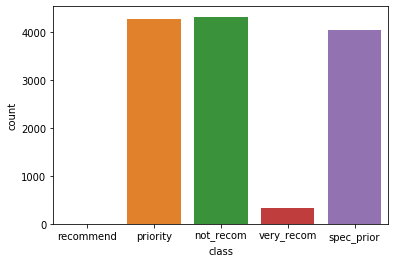

In [125]:
plot_class = sns.countplot(yn)

In [126]:
yn.value_counts()

not_recom     4320
priority      4266
spec_prior    4044
very_recom     328
recommend        2
Name: class, dtype: int64

In [127]:
xn_train, xn_test, yn_train, yn_test = train_test_split(xn, yn, test_size = 0.3)

In [128]:
xn_train.head()

,parents,has_nurs,form,children,housing,finance,social,health
9373,great_pret,proper,foster,2,less_conv,inconv,slightly_prob,priority
5532,pretentious,less_proper,completed,3,less_conv,convenient,problematic,recommended
3379,usual,critical,foster,3,less_conv,inconv,slightly_prob,priority
3491,usual,very_crit,complete,1,less_conv,inconv,problematic,not_recom
7672,pretentious,critical,foster,3,convenient,convenient,slightly_prob,priority


In [129]:
pqr = xn_train

In [130]:
pqr.insert(8,'class',yn_train,True)

In [131]:
pqr.head()

,parents,has_nurs,form,children,housing,finance,social,health,class
9373,great_pret,proper,foster,2,less_conv,inconv,slightly_prob,priority,spec_prior
5532,pretentious,less_proper,completed,3,less_conv,convenient,problematic,recommended,priority
3379,usual,critical,foster,3,less_conv,inconv,slightly_prob,priority,spec_prior
3491,usual,very_crit,complete,1,less_conv,inconv,problematic,not_recom,not_recom
7672,pretentious,critical,foster,3,convenient,convenient,slightly_prob,priority,spec_prior


In [132]:
yn_train.value_counts()

not_recom     3011
priority      2990
spec_prior    2838
very_recom     231
recommend        2
Name: class, dtype: int64

In [133]:
datan_1 = pqr[pqr['class']=='very_recom']  
datan_1.head()

,parents,has_nurs,form,children,housing,finance,social,health,class
5184,pretentious,less_proper,complete,1,convenient,convenient,nonprob,recommended,very_recom
378,usual,proper,completed,more,convenient,convenient,nonprob,recommended,very_recom
909,usual,less_proper,complete,1,critical,inconv,nonprob,recommended,very_recom
4566,pretentious,proper,completed,1,less_conv,inconv,slightly_prob,recommended,very_recom
651,usual,proper,foster,1,convenient,convenient,slightly_prob,recommended,very_recom


In [134]:
datan_2 = pqr[pqr['class']== 'recommend']
datan_2.head()

,parents,has_nurs,form,children,housing,finance,social,health,class
0,usual,proper,complete,1,convenient,convenient,nonprob,recommended,recommend
3,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend


In [135]:
datan_n = pqr[pqr['class']== 'priority']
datan_n.head()

,parents,has_nurs,form,children,housing,finance,social,health,class
5532,pretentious,less_proper,completed,3,less_conv,convenient,problematic,recommended,priority
5776,pretentious,less_proper,incomplete,3,critical,inconv,problematic,priority,priority
9153,great_pret,proper,incomplete,2,less_conv,inconv,nonprob,recommended,priority
5980,pretentious,less_proper,foster,3,critical,convenient,slightly_prob,priority,priority
5863,pretentious,less_proper,foster,1,less_conv,inconv,slightly_prob,priority,priority


In [136]:
datan_n = datan_n.append(datan_1) #appending very_reco
datan_n.tail()

,parents,has_nurs,form,children,housing,finance,social,health,class
4971,pretentious,proper,foster,1,convenient,convenient,slightly_prob,recommended,very_recom
2109,usual,improper,completed,more,convenient,convenient,slightly_prob,recommended,very_recom
4368,pretentious,proper,complete,1,critical,inconv,slightly_prob,recommended,very_recom
1998,usual,improper,completed,2,convenient,convenient,nonprob,recommended,very_recom
162,usual,proper,complete,more,convenient,convenient,nonprob,recommended,very_recom


In [137]:
datan_n.describe()

,parents,has_nurs,form,children,housing,finance,social,health,class
count,3221,3221,3221,3221,3221,3221,3221,3221,3221
unique,3,5,4,4,3,2,3,2,2
top,usual,proper,complete,1,convenient,convenient,nonprob,recommended,priority
freq,1483,1051,883,932,1250,1744,1185,1930,2990


In [138]:
xn1 = datan_n.iloc[:, 0:8]
yn1 = datan_n.iloc[:, -1]

In [139]:
oversampler = RandomOverSampler()
xn1_resampled, yn1_resampled = oversampler.fit_resample(xn1, yn1)

In [140]:
data2n_final = pd.DataFrame(xn1_resampled)
data2n_final.head()

,0,1,2,3,4,5,6,7
0,pretentious,less_proper,completed,3,less_conv,convenient,problematic,recommended
1,pretentious,less_proper,incomplete,3,critical,inconv,problematic,priority
2,great_pret,proper,incomplete,2,less_conv,inconv,nonprob,recommended
3,pretentious,less_proper,foster,3,critical,convenient,slightly_prob,priority
4,pretentious,less_proper,foster,1,less_conv,inconv,slightly_prob,priority


In [141]:
data2n_final['class']=pd.DataFrame(yn1_resampled)
data2n_final.head()

,0,1,2,3,4,5,6,7,class
0,pretentious,less_proper,completed,3,less_conv,convenient,problematic,recommended,priority
1,pretentious,less_proper,incomplete,3,critical,inconv,problematic,priority,priority
2,great_pret,proper,incomplete,2,less_conv,inconv,nonprob,recommended,priority
3,pretentious,less_proper,foster,3,critical,convenient,slightly_prob,priority,priority
4,pretentious,less_proper,foster,1,less_conv,inconv,slightly_prob,priority,priority


In [142]:
data2n_final.columns=['parents','has_nurs','form','children','housing','finance','social','health','class']
data2n_final.head()

,parents,has_nurs,form,children,housing,finance,social,health,class
0,pretentious,less_proper,completed,3,less_conv,convenient,problematic,recommended,priority
1,pretentious,less_proper,incomplete,3,critical,inconv,problematic,priority,priority
2,great_pret,proper,incomplete,2,less_conv,inconv,nonprob,recommended,priority
3,pretentious,less_proper,foster,3,critical,convenient,slightly_prob,priority,priority
4,pretentious,less_proper,foster,1,less_conv,inconv,slightly_prob,priority,priority


In [143]:
data2n = pqr[pqr['class']== 'not_recom']
data2n.head()

,parents,has_nurs,form,children,housing,finance,social,health,class
3491,usual,very_crit,complete,1,less_conv,inconv,problematic,not_recom,not_recom
11762,great_pret,critical,incomplete,2,critical,convenient,problematic,not_recom,not_recom
8966,great_pret,proper,completed,3,convenient,convenient,nonprob,not_recom,not_recom
10448,great_pret,improper,complete,2,less_conv,convenient,problematic,not_recom,not_recom
2684,usual,critical,complete,2,critical,convenient,nonprob,not_recom,not_recom


In [144]:
data2n = data2n.append(datan_2)
data2n.describe()

,parents,has_nurs,form,children,housing,finance,social,health,class
count,3013,3013,3013,3013,3013,3013,3013,3013,3013
unique,3,5,4,4,3,2,3,2,2
top,great_pret,less_proper,completed,3,convenient,convenient,slightly_prob,not_recom,not_recom
freq,1016,624,760,775,1016,1516,1018,3011,3011


In [145]:
x1n = data2n.iloc[:, 0:8]
x1n.head()

,parents,has_nurs,form,children,housing,finance,social,health
3491,usual,very_crit,complete,1,less_conv,inconv,problematic,not_recom
11762,great_pret,critical,incomplete,2,critical,convenient,problematic,not_recom
8966,great_pret,proper,completed,3,convenient,convenient,nonprob,not_recom
10448,great_pret,improper,complete,2,less_conv,convenient,problematic,not_recom
2684,usual,critical,complete,2,critical,convenient,nonprob,not_recom


In [146]:
y1n = data2n.iloc[:,-1]
y1n.head()

3491     not_recom
11762    not_recom
8966     not_recom
10448    not_recom
2684     not_recom
Name: class, dtype: object

In [147]:
x1_resampled, y1_resampled = oversampler.fit_resample(x1n, y1n)

In [148]:
data22n = pd.DataFrame(x1_resampled)
data22n.head()

,0,1,2,3,4,5,6,7
0,usual,very_crit,complete,1,less_conv,inconv,problematic,not_recom
1,great_pret,critical,incomplete,2,critical,convenient,problematic,not_recom
2,great_pret,proper,completed,3,convenient,convenient,nonprob,not_recom
3,great_pret,improper,complete,2,less_conv,convenient,problematic,not_recom
4,usual,critical,complete,2,critical,convenient,nonprob,not_recom


In [149]:
data22n['class']=pd.DataFrame(y1_resampled)
data22n.head()

,0,1,2,3,4,5,6,7,class
0,usual,very_crit,complete,1,less_conv,inconv,problematic,not_recom,not_recom
1,great_pret,critical,incomplete,2,critical,convenient,problematic,not_recom,not_recom
2,great_pret,proper,completed,3,convenient,convenient,nonprob,not_recom,not_recom
3,great_pret,improper,complete,2,less_conv,convenient,problematic,not_recom,not_recom
4,usual,critical,complete,2,critical,convenient,nonprob,not_recom,not_recom


In [150]:
data22n.columns=['parents','has_nurs','form','children','housing','finance','social','health','class']
data22n.head()

,parents,has_nurs,form,children,housing,finance,social,health,class
0,usual,very_crit,complete,1,less_conv,inconv,problematic,not_recom,not_recom
1,great_pret,critical,incomplete,2,critical,convenient,problematic,not_recom,not_recom
2,great_pret,proper,completed,3,convenient,convenient,nonprob,not_recom,not_recom
3,great_pret,improper,complete,2,less_conv,convenient,problematic,not_recom,not_recom
4,usual,critical,complete,2,critical,convenient,nonprob,not_recom,not_recom


In [151]:
data2n_final = data2n_final.append(data22n)

In [152]:
data2n_final = data2n_final. append(pqr[pqr['class']== 'spec_prior'])

In [153]:
data2n_final.describe()

,parents,has_nurs,form,children,housing,finance,social,health,class
count,14840,14840,14840,14840,14840,14840,14840,14840,14840
unique,3,5,4,4,3,2,3,3,5
top,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend
freq,7580,5872,6296,6466,7759,9412,5931,8824,3011


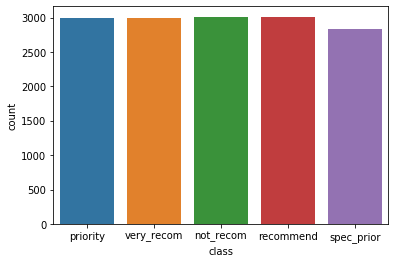

In [154]:
plot_class = sns.countplot(x="class", data= data2n_final)

In [155]:
xn_train = data2n_final.iloc[:,0:8]
xn_train.head()

,parents,has_nurs,form,children,housing,finance,social,health
0,pretentious,less_proper,completed,3,less_conv,convenient,problematic,recommended
1,pretentious,less_proper,incomplete,3,critical,inconv,problematic,priority
2,great_pret,proper,incomplete,2,less_conv,inconv,nonprob,recommended
3,pretentious,less_proper,foster,3,critical,convenient,slightly_prob,priority
4,pretentious,less_proper,foster,1,less_conv,inconv,slightly_prob,priority


In [156]:
xn_train = pd.get_dummies(xn_train)

In [157]:
xn_train.head()

,parents_great_pret,parents_pretentious,parents_usual,has_nurs_critical,has_nurs_improper,has_nurs_less_proper,has_nurs_proper,has_nurs_very_crit,form_complete,form_completed,...,housing_critical,housing_less_conv,finance_convenient,finance_inconv,social_nonprob,social_problematic,social_slightly_prob,health_not_recom,health_priority,health_recommended
0,0,1,0,0,0,1,0,0,0,1,...,0,1,1,0,0,1,0,0,0,1
1,0,1,0,0,0,1,0,0,0,0,...,1,0,0,1,0,1,0,0,1,0
2,1,0,0,0,0,0,1,0,0,0,...,0,1,0,1,1,0,0,0,0,1
3,0,1,0,0,0,1,0,0,0,0,...,1,0,1,0,0,0,1,0,1,0
4,0,1,0,0,0,1,0,0,0,0,...,0,1,0,1,0,0,1,0,1,0


In [158]:
yn_train = data2n_final.iloc[:,-1]
yn_train.head()

0    priority
1    priority
2    priority
3    priority
4    priority
Name: class, dtype: object

In [159]:
yn_train = pd.DataFrame(yn_train)
yn_train.head()

,class
0,priority
1,priority
2,priority
3,priority
4,priority


In [160]:
rep_val = {'priority':1,'spec_prior':2,'not_recom':3,'very_recom':4,'recommend':5}
yn_train['class'] = [rep_val[i] for i in yn_train['class']]

In [161]:
yn_train.head()

,class
0,1
1,1
2,1
3,1
4,1


In [162]:
xn_test = pd.get_dummies(xn_test)
xn_test.head()

,parents_great_pret,parents_pretentious,parents_usual,has_nurs_critical,has_nurs_improper,has_nurs_less_proper,has_nurs_proper,has_nurs_very_crit,form_complete,form_completed,...,housing_critical,housing_less_conv,finance_convenient,finance_inconv,social_nonprob,social_problematic,social_slightly_prob,health_not_recom,health_priority,health_recommended
3945,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,1
12858,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,1
9728,1,0,0,0,0,1,0,0,0,1,...,0,0,1,0,0,1,0,1,0,0
3852,0,0,1,0,0,0,0,1,0,1,...,0,1,1,0,1,0,0,0,0,1
4670,0,1,0,0,0,0,1,0,0,1,...,0,1,1,0,0,1,0,1,0,0


In [163]:
yn_test

3945       priority
12858    spec_prior
9728      not_recom
3852     spec_prior
4670      not_recom
            ...    
4981       priority
11822     not_recom
7497     spec_prior
8074     spec_prior
7867     spec_prior
Name: class, Length: 3888, dtype: object

In [164]:
yn_test = pd.DataFrame(yn_test)
yn_test

,class
3945,priority
12858,spec_prior
9728,not_recom
3852,spec_prior
4670,not_recom
...,...
4981,priority
11822,not_recom
7497,spec_prior
8074,spec_prior


In [165]:
rep_val = {'priority':1,'spec_prior':2,'not_recom':3,'very_recom':4,'recommend':5}
yn_test['class'] = [rep_val[i] for i in yn_test['class']]

In [166]:
yn_test.head()

,class
3945,1
12858,2
9728,3
3852,2
4670,3


# Base Classifier

In [167]:
dt2n_training = np.tile(0., 27)
dt2n_testing = np.tile(0., 27)
print("depth | Training score    | Testing score")
for i in range (1,27):
    print(i,end="   |   ")
    dt2 = tree.DecisionTreeClassifier(max_depth=i,criterion = 'entropy')
    dt2.fit(xn_train, yn_train)
    score1 = dt2.score(xn_train,yn_train)
    dt2n_training[i] = score1.mean()
    print(round(dt2n_training[i],5), end = "         |  ")
    #dt2.fit(xnf_test, ynf_test)
    score2 = dt2.score(xn_test,yn_test)
    dt2n_testing[i] = score2.mean()
    print(round(dt2n_testing[i],5))
    

depth | Training score    | Testing score
1   |   0.4058         |  0.33668
2   |   0.58524         |  0.62706
3   |   0.6878         |  0.53601
4   |   0.77089         |  0.65226
5   |   0.84137         |  0.7482
6   |   0.89569         |  0.8251
7   |   0.9254         |  0.86986
8   |0.94373         |  0.90586
9   |   0.95923         |  0.91641
10   |   0.97439         |  0.94264
11   |0.9847         |  0.96296
12   |   0.99387         |  0.97968
13   |   0.9969         |  0.98611
14   |   0.99811         |  0.98945
15   |   0.9998         |  0.99048
16   |   0.99993         |  0.991
17   |1.0         |  0.99048
18   |   1.0         |  0.99228
19   |   1.0         |  0.99357
20   |   1.0         |  0.99203
21   |1.0         |  0.991
22   |   1.0         |  0.99203
23   |   1.0         |  0.99151
24   |   1.0         |  0.99151
25   |1.0         |  0.99228
26   |   1.0         |  0.99074


In [168]:
dt2n_training=dt2n_training[dt2n_training!=0.]
dt2n_testing=dt2n_testing[dt2n_testing!=0.]
xaxis2 = array.array('i',(i for i in range(1,27)))

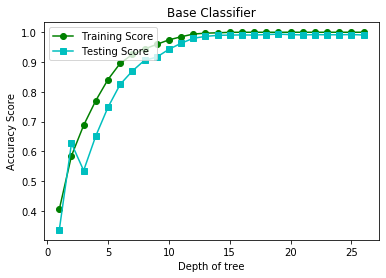

In [169]:
fig5, p5 = plt.subplots()
plt.plot(xaxis2, dt2n_training,'go-', Label='Training Score')
plt.plot(xaxis2, dt2n_testing,'cs-', Label = 'Testing Score')
plt.xlabel('Depth of tree')
plt.ylabel('Accuracy Score')
plt.title('Base Classifier')
legend = p5.legend(loc='upper left')

Oversampling hasn't caused the model to overfit in this case. 

The model isn't overfitting thus even if bagging is applied there wont be much difference in performance. 

# Bagging

In [170]:
#Bagging
train = np.tile(0., 27)
test = np.tile(0., 27)
print("depth | Training score    | Testing score")
for i in range(1,27):
    print(i,end="   |   ")
    model = BaggingClassifier(tree.DecisionTreeClassifier(max_depth=i,criterion = 'entropy'))
    model.fit(xn_train, yn_train.values.ravel())
    score1 = model.score(xn_train,yn_train)
    train[i] = score1.mean()
    print(round(train[i],5), end = "         |  ")
    score2 = model.score(xn_test,yn_test)
    test[i] = score2.mean()
    print(round(test[i],5))

depth | Training score    | Testing score
1   |   0.4058         |  0.33668
2   |0.58524         |  0.62706
3   |0.6878         |  0.53601
4   |0.77743         |  0.66538
5   |0.85088         |  0.76132
6   |0.90148         |  0.83333
7   |0.93457         |  0.8876
8   |0.96186         |  0.92567
9   |0.97257         |  0.93699
10   |0.98578         |  0.96271
11   |0.99292         |  0.97891
12   |0.99744         |  0.98714
13   |0.99865         |  0.99023
14   |0.9996         |  0.99383
15   |0.99987         |  0.99306
16   |0.99993         |  0.9928
17   |0.99993         |  0.9928
18   |0.9998         |  0.99383
19   |0.99993         |  0.99486
20   |0.99966         |  0.99254
21   |1.0         |  0.99588
22   |0.9998         |  0.99177
23   |1.0         |  0.99228
24   |0.99987         |  0.99228
25   |0.9998         |  0.99177
26   |1.0         |  0.99563


In [171]:
train=train[train!=0.]
test=test[test!=0.]
xaxis2 = array.array('i',(i for i in range(1,27)))
xaxis2

array('i', [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26])

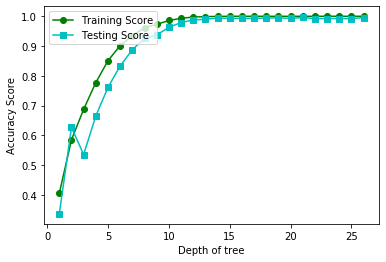

In [172]:
fig2, aa2 = plt.subplots()
plt.plot(xaxis2, train,'go-', Label='Training Score')
plt.plot(xaxis2, test,'cs-', Label = 'Testing Score')
plt.xlabel('Depth of tree')
plt.ylabel('Accuracy Score')
legend = aa2.legend(loc='upper left')

In [173]:
comp_ros = ([0.33847737, 0.33873457, 0.61599794, 0.65817901, 0.77057613,
       0.84053498, 0.89403292, 0.90817901, 0.93132716, 0.94881687,
       0.968107  , 0.98302469, 0.99074074, 0.99356996, 0.99331276,
       0.99279835, 0.99356996, 0.99279835, 0.99279835, 0.99331276,
       0.99331276, 0.99254115, 0.99279835, 0.99408436, 0.99305556,
       0.99279835])

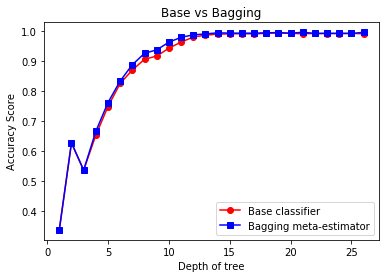

In [174]:
fig1, aa1 = plt.subplots()
plt.plot(xaxis2, dt2n_testing,'ro-', Label='Base classifier')
plt.plot(xaxis2, test,'bs-', Label = 'Bagging meta-estimator')
plt.xlabel('Depth of tree')
plt.ylabel('Accuracy Score')
plt.title('Base vs Bagging')
legend = aa1.legend(loc='lower right')

# Random Forest Classifier

In [175]:
train_rf = np.tile(0., 27)
test_rf = np.tile(0., 27)
print("depth | Training score    | Testing score")
for i in range(1,27):
    print(i,end="   |   ")
    model_rf = RandomForestClassifier(max_depth=i, criterion = 'entropy',n_estimators=100)
    model_rf.fit(xn_train, yn_train.values.ravel())
    score1 = model_rf.score(xn_train,yn_train)
    train_rf[i] = score1.mean()
    print(round(train_rf[i],5), end = "         |  ")
    score2 = model_rf.score(xn_test,yn_test)
    test_rf[i] = score2.mean()
    print(round(test_rf[i],5))

depth | Training score    | Testing score
1   |0.6436         |  0.56276
2   |0.74164         |  0.66152
3   |0.81146         |  0.72659
4   |0.86833         |  0.80967
5   |0.90081         |  0.84774
6   |0.93686         |  0.88915
7   |0.95957         |  0.9249
8   |0.96947         |  0.94136
9   |0.97992         |  0.9573
10   |0.98908         |  0.96939
11   |0.99609         |  0.97917
12   |0.99879         |  0.98251
13   |1.0         |  0.98817
14   |1.0         |  0.9928
15   |1.0         |  0.99151
16   |1.0         |  0.99023
17   |1.0         |  0.991
18   |1.0         |  0.99074
19   |1.0         |  0.99203
20   |1.0         |  0.99048
21   |1.0         |  0.99151
22   |1.0         |  0.99126
23   |1.0         |  0.99331
24   |1.0         |  0.99177
25   |1.0         |  0.99126
26   |1.0         |  0.99074


In [176]:
train_rf=train_rf[train_rf!=0.]
test_rf=test_rf[test_rf!=0.]
xaxis2 = array.array('i',(i for i in range(1,27)))
xaxis2

array('i', [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26])

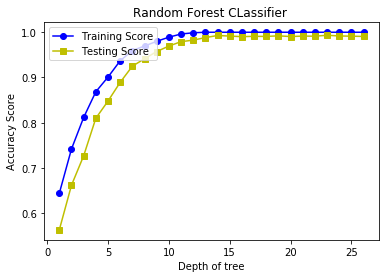

In [177]:
fig3, b3 = plt.subplots()
plt.plot(xaxis2, train_rf,'bo-', Label='Training Score')
plt.plot(xaxis2, test_rf,'ys-', Label = 'Testing Score')
plt.xlabel('Depth of tree')
plt.ylabel('Accuracy Score')
plt.title('Random Forest CLassifier ')
legend = b3.legend(loc='upper left')

# Comparision of Base - Bagging- Random Forest

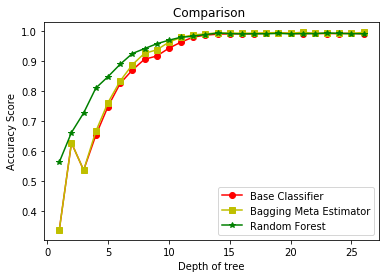

In [178]:
fig4, b4 = plt.subplots()
plt.plot(xaxis2,  dt2n_testing,'ro-', Label='Base Classifier')
plt.plot(xaxis2, test,'ys-', Label = 'Bagging Meta Estimator')
plt.plot(xaxis2, test_rf,'g*-', Label = 'Random Forest')
plt.xlabel('Depth of tree')
plt.ylabel('Accuracy Score')
plt.title('Comparison ')
legend = b4.legend(loc='lower right')

As expected, except for the depth~2, base classifier (Decision Tree) is performing similiar to that of bagging techniques

# XGBoost

In [179]:
train_xgb_md = np.tile(0., 30)
test_xgb_md = np.tile(0., 30)
print("depth | Training score    | Testing score")
for i in range (1,27):
    print(i,end="   |   ")
    clf_xgb_md = xgb.XGBClassifier(n_estimators=100,max_depth=i)
    clf_xgb_md.fit(xn_train, yn_train.values.ravel())
    score1 = clf_xgb_md.score(xn_train, yn_train)
    train_xgb_md[i] = score1.mean()
    print(round(train_xgb_md[i],4), end = "         |  ")
    score2 = clf_xgb_md.score(xn_test,yn_test)
    test_xgb_md[i] = score2.mean()
    print(round(test_xgb_md[i],4))


depth | Training score    | Testing score
1   |0.9319         |  0.8884
2   |0.9783         |  0.9601
3   |0.9969         |  0.9951
4   |0.9999         |  0.9982
5   |1.0         |  0.9995
6   |1.0         |  0.9995
7   |1.0         |  0.9992
8   |1.0         |  0.9995
9   |1.0         |  0.9992
10   |1.0         |  0.9997
11   |1.0         |  0.9997
12   |1.0         |  0.9997
13   |1.0         |  0.9997
14   |1.0         |  0.9997
15   |1.0         |  0.9997
16   |1.0         |  0.9997
17   |1.0         |  0.9997
18   |1.0         |  0.9997
19   |1.0         |  0.9997
20   |1.0         |  0.9997
21   |1.0         |  0.9997
22   |1.0         |  0.9997
23   |1.0         |  0.9997
24   |1.0         |  0.9997
25   |1.0         |  0.9997
26   |1.0         |  0.9997


In [180]:
train_xgb_md=train_xgb_md[train_xgb_md!=0.]
test_xgb_md=test_xgb_md[test_xgb_md!=0.]
xaxis = array.array('i',(i for i in range(1,27)))

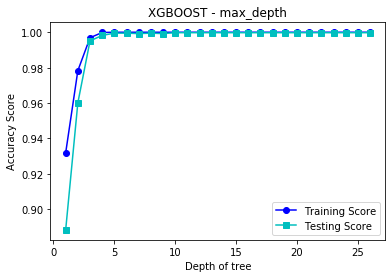

In [181]:
fig4, a4 = plt.subplots()
plt.plot(xaxis, train_xgb_md,'bo-', Label='Training Score')
plt.plot(xaxis, test_xgb_md,'cs-', Label = 'Testing Score')
plt.xlabel('Depth of tree')
plt.ylabel('Accuracy Score')
plt.title('XGBOOST - max_depth')
legend = a4.legend(loc='lower right')

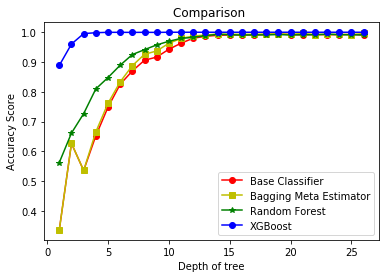

In [182]:
fig5, b5 = plt.subplots()
plt.plot(xaxis2,  dt2n_testing,'ro-', Label='Base Classifier')
plt.plot(xaxis2, test,'ys-', Label = 'Bagging Meta Estimator')
plt.plot(xaxis2, test_rf,'g*-', Label = 'Random Forest')
plt.plot(xaxis2, test_xgb_md,'bo-', Label = 'XGBoost')
plt.xlabel('Depth of tree')
plt.ylabel('Accuracy Score')
plt.title('Comparison ')
legend = b5.legend(loc='lower right')

Boosting is used when we already have strong base classifier. In this case, decision tree was already a strong classifiers. Although, all the classifiers have similar performances athigher levels of depth, XGBooost performed significantly better in comparison with the other models even at lower depth levels. 